--- K-NN 구현 테스트 ---
K = 5
정확도: 100.00%


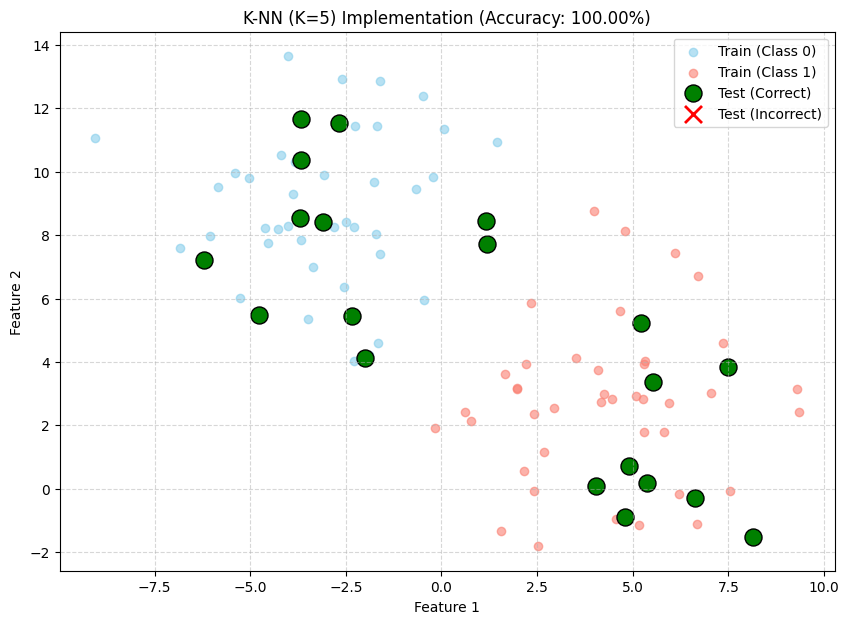

In [ ]:
import numpy as np
from collections import Counter

def euclidean_distance(x1, x2):
    """ 두 점 사이의 유클리드 거리 계산 """
    return np.sqrt(np.sum((x1 - x2)**2))

class KNN:
    """ K-Nearest Neighbors 분류기 """

    def __init__(self, k=3):
        """
        k: 참조할 이웃의 수
        """
        self.k = k

    def fit(self, X, y):
        """
        K-NN은 '게으른 학습'으로, 훈련 데이터를 저장만 합니다.
        X: 훈련 데이터 특성 (numpy array)
        y: 훈련 데이터 레이블 (numpy array)
        """
        self.X_train = X
        self.y_train = y

    def predict(self, X_test):
        """
        테스트 데이터에 대한 레이블을 예측합니다.
        X_test: 테스트 데이터 특성 (numpy array)
        """
        predictions = [self._predict_one(x) for x in X_test]
        return np.array(predictions)

    def _predict_one(self, x):
        """
        하나의 테스트 데이터 포인트 x에 대해 예측합니다.
        """
        # 1. 모든 훈련 데이터와의 거리 계산
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        # 2. 거리가 가까운 순으로 K개의 인덱스(이웃)를 얻음
        k_indices = np.argsort(distances)[:self.k]

        # 3. K개 이웃들의 레이블을 추출
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # 4. 가장 빈도가 높은 레이블을 찾아 반환 (다수결)
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

# --- 사용 예제 (시각화) ---
if __name__ == "__main__":
    import matplotlib.pyplot as plt
    from sklearn.datasets import make_blobs
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score

    print("--- K-NN 구현 테스트 ---")

    # 1. 데이터 생성
    X, y = make_blobs(n_samples=100, centers=2, n_features=2,
                      random_state=42, cluster_std=2.5)

    # 2. 데이터 분리
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 3. 모델 생성, 훈련 및 예측
    k_value = 5
    knn = KNN(k=k_value)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    # 4. 정확도 평가
    accuracy = accuracy_score(y_test, y_pred)
    print(f"K = {k_value}")
    print(f"정확도: {accuracy * 100:.2f}%")

    # 5. 시각화
    plt.figure(figsize=(10, 7))
    plt.title(f"K-NN (K={k_value}) Implementation (Accuracy: {accuracy*100:.2f}%)")

    # 훈련 데이터
    plt.scatter(X_train[y_train==0][:, 0], X_train[y_train==0][:, 1],
                c='skyblue', marker='o', label='Train (Class 0)', alpha=0.6)
    plt.scatter(X_train[y_train==1][:, 0], X_train[y_train==1][:, 1],
                c='salmon', marker='o', label='Train (Class 1)', alpha=0.6)

    # 테스트 데이터 (예측 결과에 따라)
    correct = X_test[y_pred == y_test]
    incorrect = X_test[y_pred != y_test]

    plt.scatter(correct[:, 0], correct[:, 1], c='green', marker='o',
                s=150, edgecolors='k', lw=1, label='Test (Correct)')
    plt.scatter(incorrect[:, 0], incorrect[:, 1], c='red', marker='x',
                s=150, lw=2, label='Test (Incorrect)')

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()